In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston # 
from sklearn.preprocessing import MinMaxScaler,StandardScaler #

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle
import json
import warnings
warnings.filterwarnings("ignore")

### predict the house price

In [ ]:
# Predict the house price 

### Data Gathering

In [2]:
boston_load = load_boston()
df = pd.DataFrame(boston_load.data,columns=boston_load.feature_names)
df["Price"] = boston_load.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isna().mean() * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Price      0.0
dtype: float64

<AxesSubplot:>

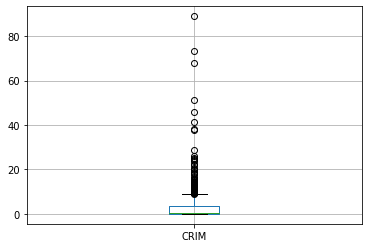

In [10]:
df[["CRIM"]].boxplot()

<AxesSubplot:xlabel='CRIM'>

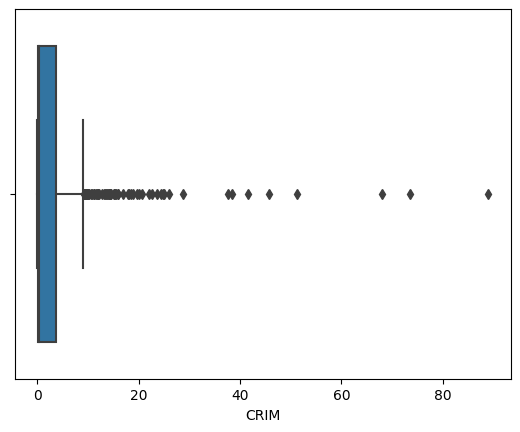

In [11]:
sns.boxplot(df["CRIM"])

### Model Training and selection

In [12]:
x = df.drop("Price",axis=1)
y = df["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=45)

In [13]:
knn_reg = KNeighborsRegressor() # k=5,p=2 (E.D)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

### Evaluation

In [14]:

# Testing
y_pred_test = knn_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 58.783447058823526
mae 5.454313725490197
R2 score 0.45610151228174467


In [15]:
# Training
y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)
print("R2 score",R2_Score)

MSE 23.23600792079208
mae 3.3059405940594058
R2 score 0.7033954963315541


### Linear Regression

In [16]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [17]:
# Testing
y_pred_test = lr_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 27.949660331548944
mae 3.8872075852609336
R2 score 0.7413935597999852


### Hyperparameter tuning

In [ ]:
for p = 2 ,k = ?

Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

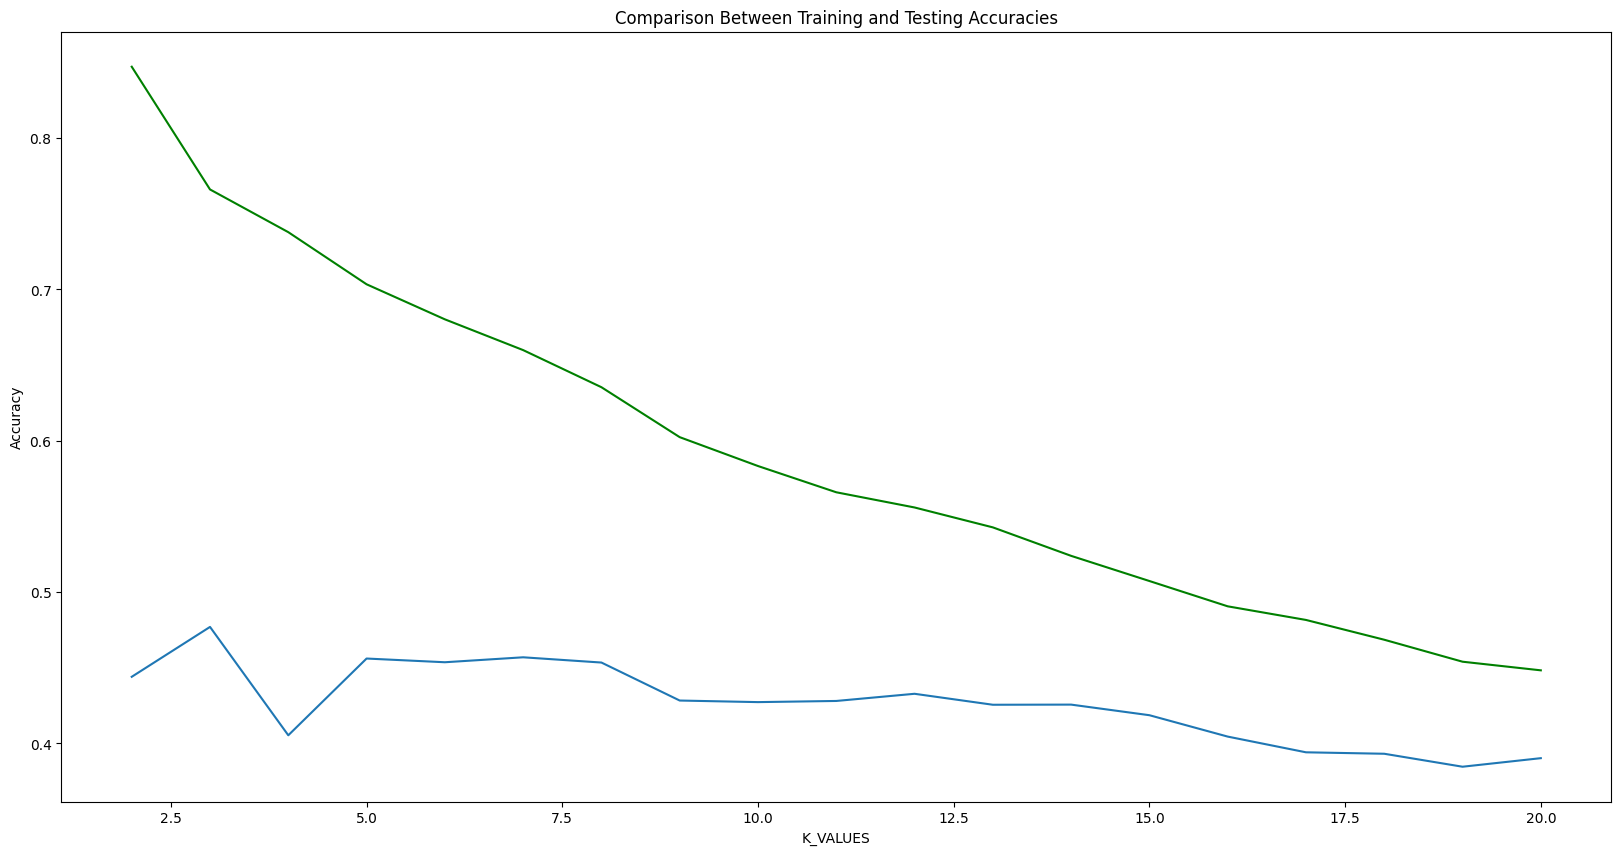

In [18]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    # Training
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")

In [ ]:
for p = 1 , k = ?

Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

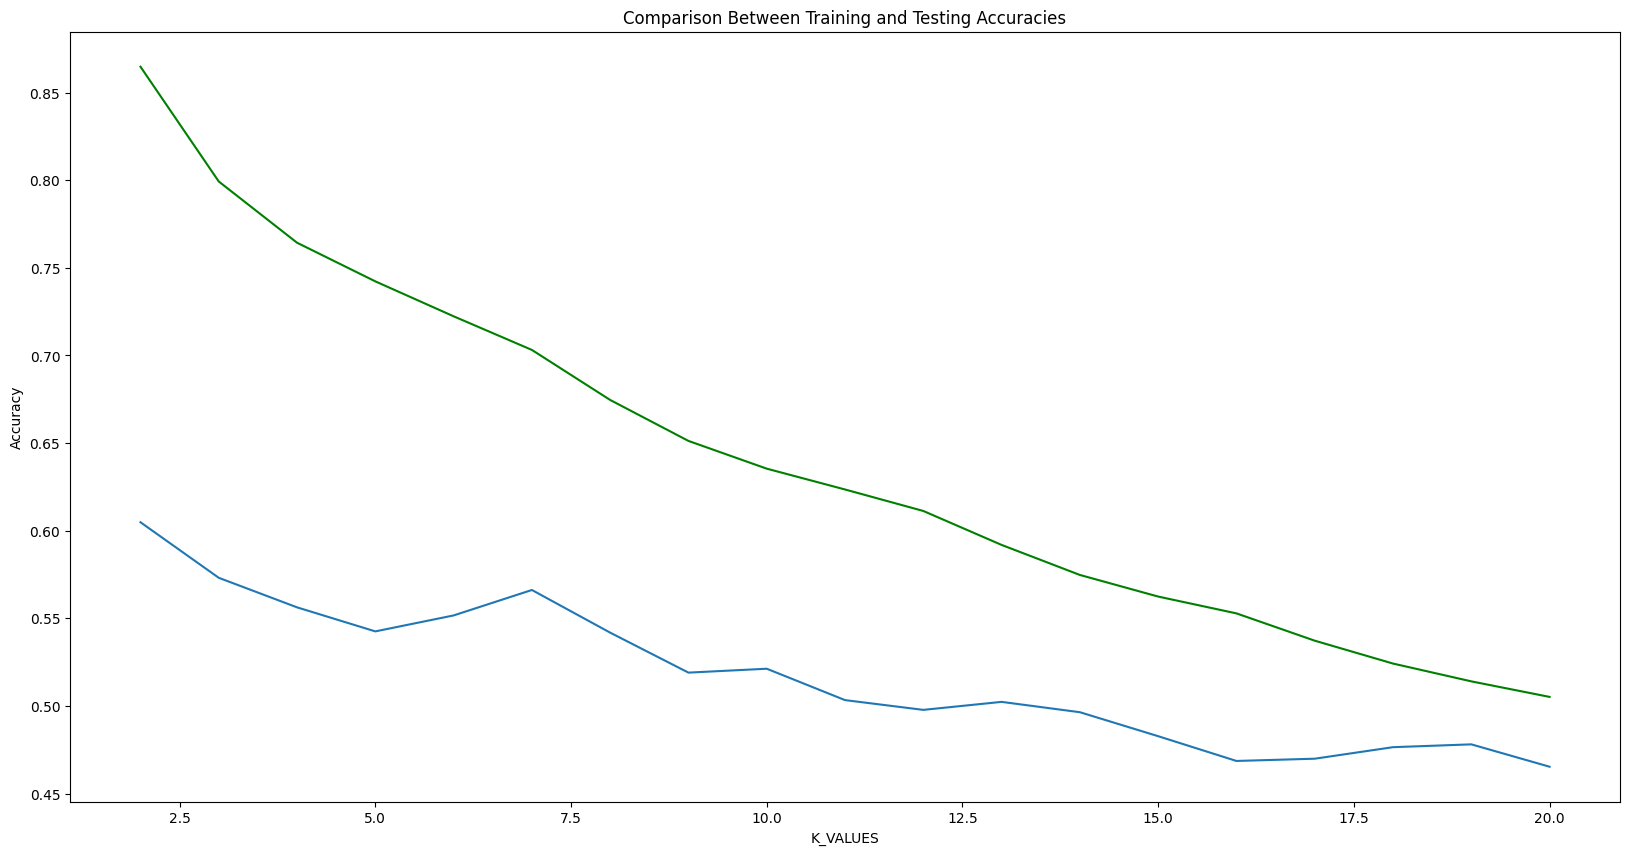

In [19]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    # Training
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")

In [20]:
knn_reg = KNeighborsRegressor(n_neighbors=2,p=1) # k=5,p=2 (E.D)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [21]:

# Testing
y_pred_test = knn_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 42.70938725490196
mae 4.6495098039215685
R2 score 0.6048280204447845


In [22]:
# Training
y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)
print("R2 score",R2_Score)

MSE 10.59819306930693
mae 2.065841584158416
R2 score 0.86471549649063


### Feature Engineering

In [ ]:
x = df.drop("Price",axis=1)
y = df["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=11)

### Normalization

In [23]:
normal_scalar = MinMaxScaler()
normal_scalar.fit(x_train) #
array = normal_scalar.transform(x_train)
normal_train_df = pd.DataFrame(array,columns=x_train.columns)
normal_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.003749,0.22,0.197947,0.0,0.094650,0.456579,0.329557,0.629805,0.260870,0.272901,0.755814,0.983055,0.200832
1,0.000533,0.00,0.493402,0.0,0.106996,0.546268,0.495366,0.439287,0.130435,0.194656,0.395349,0.989788,0.151734
2,0.025785,0.00,0.700880,0.0,0.452675,0.499492,0.959835,0.088243,0.173913,0.412214,0.244186,0.748323,0.254646
3,0.043199,0.00,0.646628,1.0,0.792181,0.514948,0.907312,0.125090,1.000000,0.914122,0.883721,0.985980,0.314840
4,0.001351,0.25,0.171188,0.0,0.139918,0.589587,0.417096,0.623021,0.304348,0.185115,0.825581,0.996672,0.210264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.015530,0.00,0.281525,0.0,0.314815,0.424446,0.814624,0.260110,0.130435,0.229008,0.976744,0.585708,0.715395
400,1.000000,0.00,0.646628,0.0,0.588477,0.631483,0.916581,0.026089,1.000000,0.914122,0.883721,1.000000,0.424133
401,0.013337,0.00,0.785557,0.0,0.491770,0.500915,0.976313,0.103793,0.130435,0.477099,1.000000,1.000000,0.286824
402,0.514104,0.00,0.646628,0.0,0.633745,0.133415,1.000000,0.048068,1.000000,0.914122,0.883721,0.221771,0.972538


In [24]:
knn_reg = KNeighborsRegressor(n_neighbors=2,p=1) # k=5,p=2 (E.D)
knn_reg.fit(normal_train_df,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [25]:
# Testing
array = normal_scalar.transform(x_test)
normal_test_df = pd.DataFrame(array,columns=x_test.columns)
# normal_test_df

y_pred_test = knn_reg.predict(normal_test_df)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 20.832009803921572
mae 3.214705882352941
R2 score 0.807250183590857


In [26]:
# Training
y_pred_train = knn_reg.predict(normal_train_df)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)
print("R2 score",R2_Score)

MSE 5.407320544554455
mae 1.535519801980198
R2 score 0.9309762833718688


### finding K and p value after scaling

Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

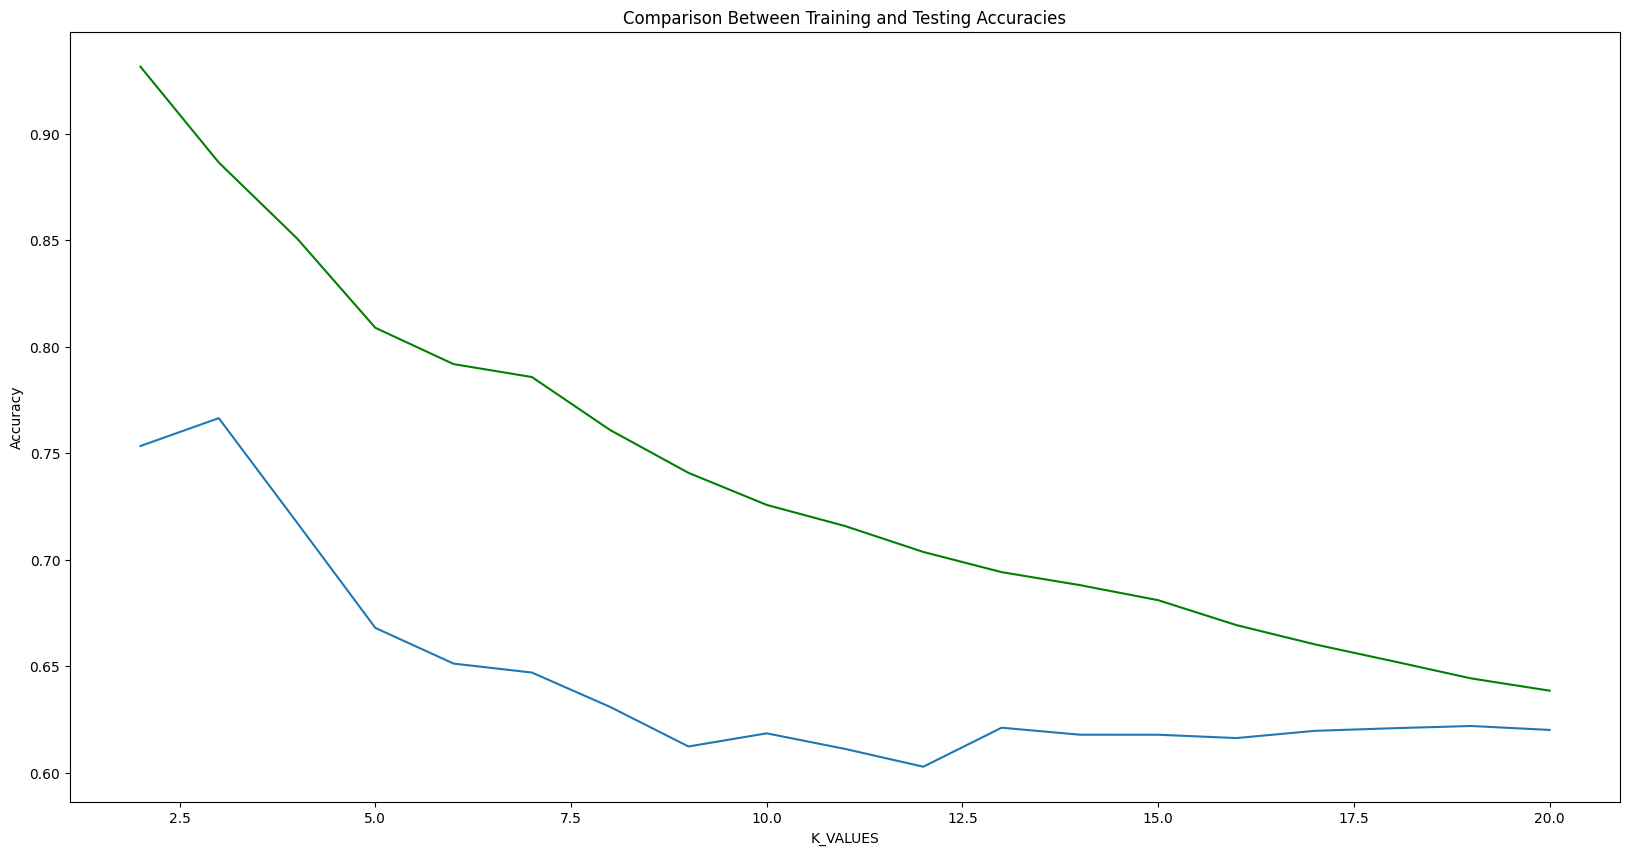

In [28]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(normal_train_df,y_train)
    # Training
    r2_train = knn_reg.score(normal_train_df,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(normal_test_df,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")



Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

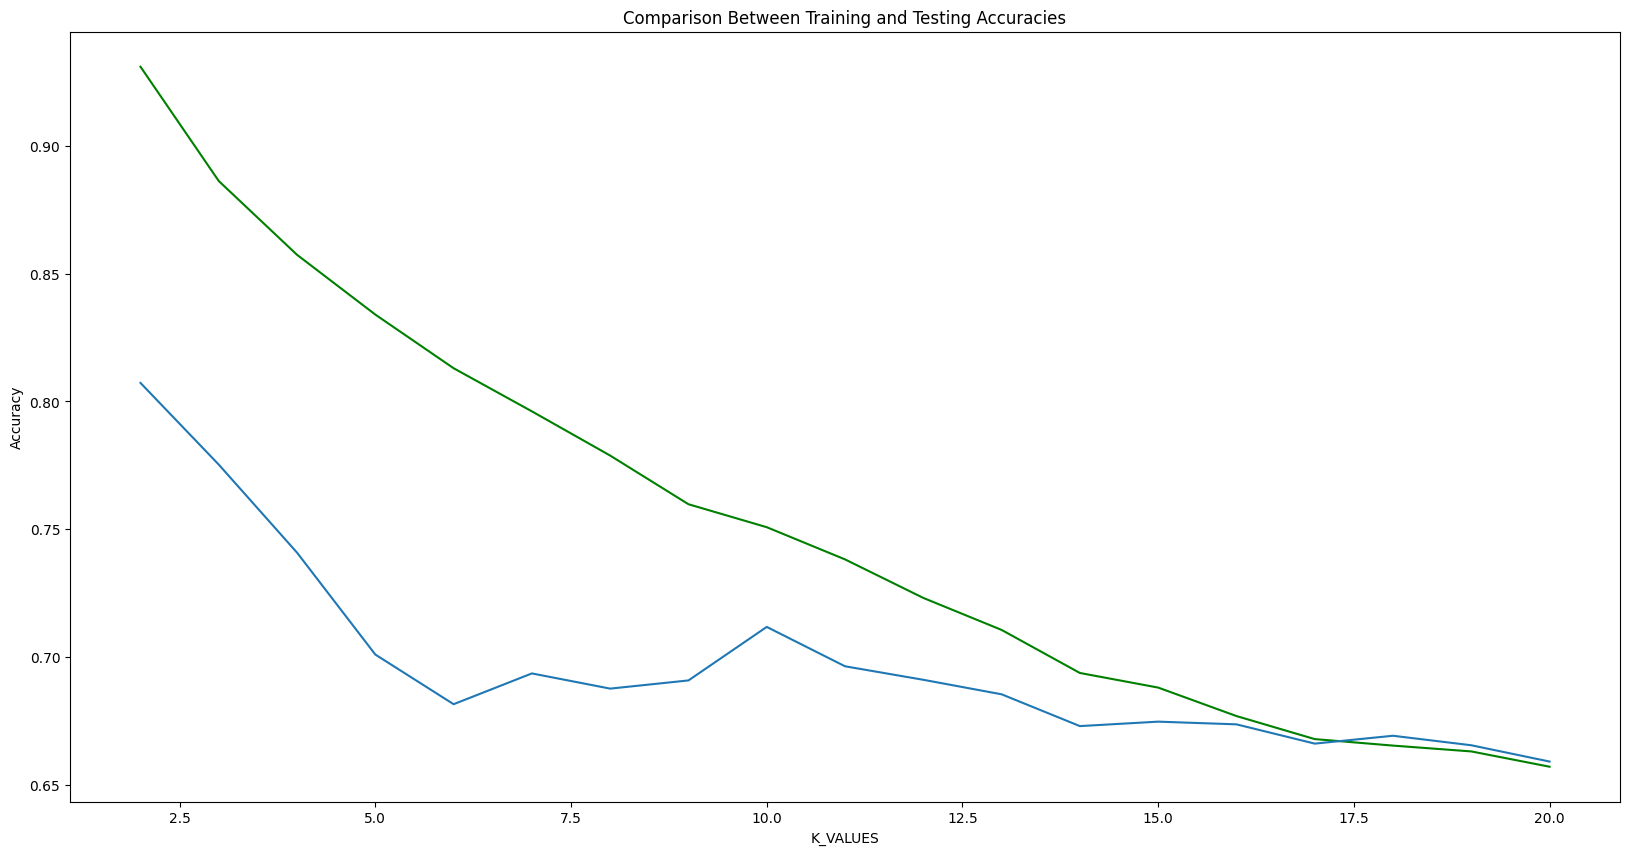

In [29]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(normal_train_df,y_train)
    # Training
    r2_train = knn_reg.score(normal_train_df,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(normal_test_df,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")


### standardization

In [30]:
std_scalar = StandardScaler()
std_scalar.fit(x_train)
array = std_scalar.transform(x_train)
std_train_df = pd.DataFrame(array,columns=x_train.columns)
# std_train_df

In [31]:
knn_reg = KNeighborsRegressor(n_neighbors=2,p=1) # k=5,p=2 (E.D)
knn_reg.fit(std_train_df,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [32]:
# Training
y_pred_train = knn_reg.predict(std_train_df)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)
print("R2 score",R2_Score)

MSE 4.7559962871287125
mae 1.4137376237623762
R2 score 0.9392903495728927


In [33]:
# Testing
array = std_scalar.transform(x_test)
std_test_df = pd.DataFrame(array,columns=x_test.columns)
# normal_test_df

y_pred_test = knn_reg.predict(std_test_df)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 21.52073529411765
mae 3.205882352941177
R2 score 0.8008776965845097


### hyperparameter

Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

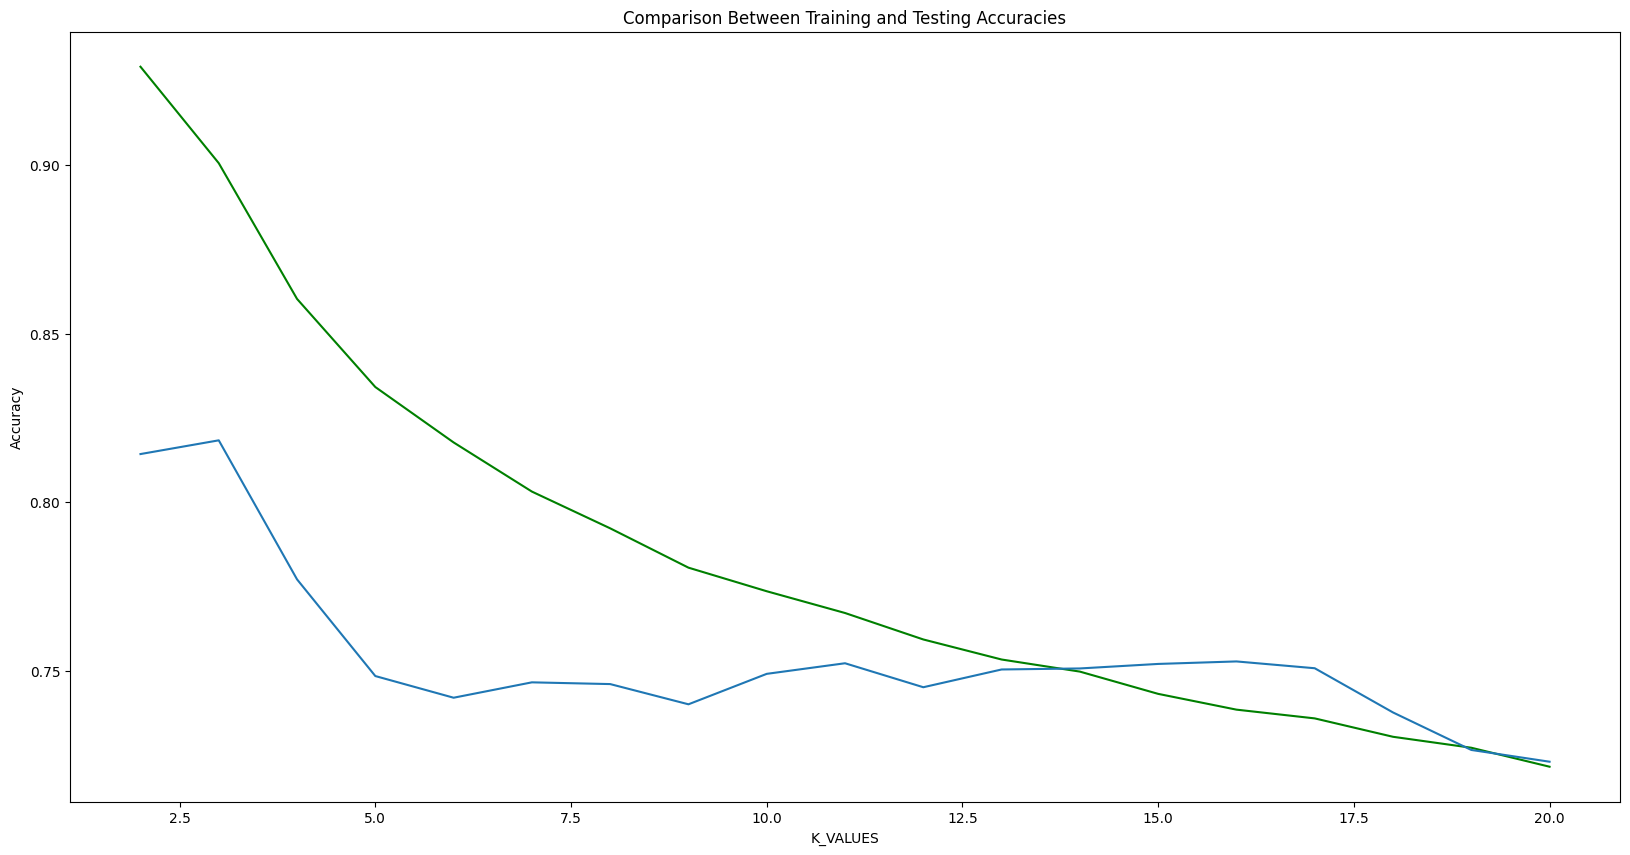

In [34]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(std_train_df,y_train)
    # Training
    r2_train = knn_reg.score(std_train_df,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")



Text(0.5, 1.0, 'Comparison Between Training and Testing Accuracies')

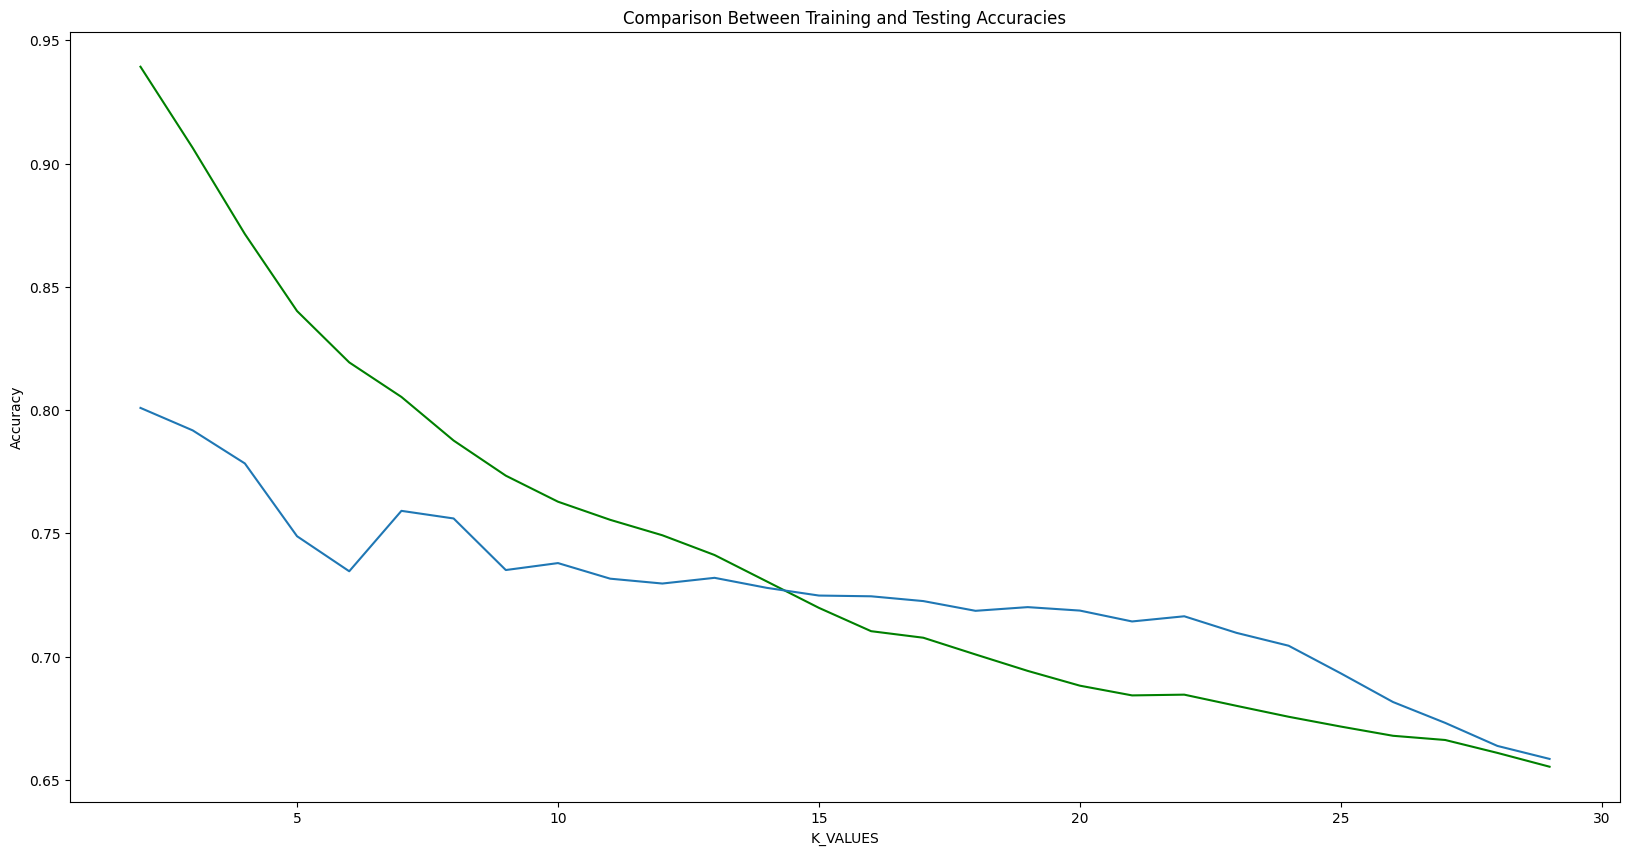

In [35]:
r2_train_list = []
r2_test_list = []
k_values = range(2,30)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_df,y_train)
    # Training
    r2_train = knn_reg.score(std_train_df,y_train)
    r2_train_list.append(r2_train)
    # Testing
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list,color="green")
plt.plot(k_values,r2_test_list)
plt.xlabel("K_VALUES")
plt.ylabel("Accuracy")
plt.title("Comparison Between Training and Testing Accuracies")



In [36]:
import pickle
with open("Scaling.pkl","wb") as file:
    pickle.dump(std_scalar,file)

In [37]:
with open("KNN_Model.pkl","wb") as f:
    pickle.dump(knn_reg,f)

In [41]:
# list(x_train.columns)
data = {"columns":list(x_train.columns)}

In [42]:
import json
with open("data.json","w") as f:
    json.dump(data,f)

In [40]:
list(x_train.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [43]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install flask_mysqldb

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install flask_mysqldb

Note: you may need to restart the kernel to use updated packages.
